In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import datetime as dt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import StackingClassifier

In [10]:
file = 'use_of_force_model_data.csv'
data = pd.read_csv(file, index_col = 0)
data.drop(columns = 'datetime', inplace = True)
data

,Incident Location: Street/Highway,Incident Location: Public Transport,Incident Location: Retail Premises,"Incident Location: Open ground (e.g. park, car park, field)",Incident Location: Licensed Premises,Incident Location: Sports or Event Stadia,Incident Location: Hospital/A&E (non-mental-health setting),Incident Location: Mental Health Setting,Incident Location: Police vehicle with prisoner handling cage,Incident Location: Police vehicle without prisoner handling cage,...,Newham,Out of force,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,is force required?
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147890,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
147891,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
147892,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
147893,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
data.iloc[:, -1].value_counts()

0    79945
1    67950
Name: is force required?, dtype: int64

# Setting the standard

- Since we have 2 variables, our target to beat is 50%. 

In [12]:
y = data.iloc[:, -1]
X = data.iloc[:, :-1]
X.shape

(147895, 77)

# Split Data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

# Creating Our Best Models

In [14]:
baseline_score = {}
def evaluate_model(model,X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    plt.figure()
    plot_learning_curves(X_train, y_train, X_test, y_test, model, print_model = False, style = 'ggplot')
    plt.title(f'{model_name} Learning Curve')
    plt.show()
    print(f'Model: {model_name}' )
    print('Model score:', round(model.score(X_test, y_test),2))
    print('----------------------------------------------------------')
    print('Classification Report:\n')
    print(metrics.classification_report(y_test, preds))
    baseline_score[model_name] = round(model.score(X_test, y_test),2)
    print('----------------------------------------------------------')
    print('Baseline Scores List')
    print(baseline_score)

In [15]:
# optimize decision tree
dt = DecisionTreeClassifier(random_state=7)
params_dt = {'max_leaf_nodes': np.arange(2, 100)}
dt_gs = GridSearchCV(dt, params_dt, cv = 5)
dt_gs.fit(X_train, y_train)
dt_best = dt_gs.best_estimator_
print(dt_best)

DecisionTreeClassifier(max_leaf_nodes=95, random_state=7)


In [16]:
# Decision Tree
dt = DecisionTreeClassifier(max_leaf_nodes=95, random_state = 7)


# Logistic Regression Bagging
dtbag = BaggingClassifier(base_estimator = DecisionTreeClassifier(max_leaf_nodes=95, random_state = 7))

# Stacking
gbc = GradientBoostingClassifier(random_state=7)

models = [dt, dtbag, gbc]
model_names = ['Decision Tree', 'Decision Tree Bagger', 'Gradient Booster']

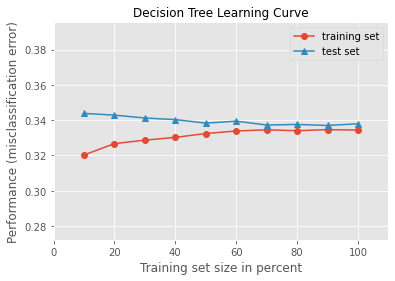

Model: Decision Tree
Model score: 0.66
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.64      0.87      0.73     15998
           1       0.73      0.42      0.53     13581

    accuracy                           0.66     29579
   macro avg       0.68      0.64      0.63     29579
weighted avg       0.68      0.66      0.64     29579

----------------------------------------------------------
Baseline Scores List
{'Decision Tree': 0.66}


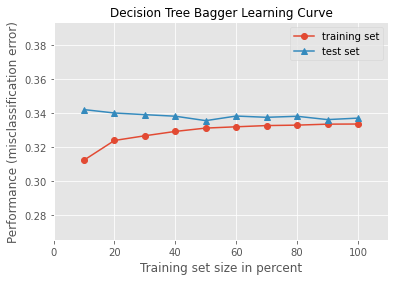

Model: Decision Tree Bagger
Model score: 0.66
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.64      0.87      0.74     15998
           1       0.73      0.42      0.54     13581

    accuracy                           0.66     29579
   macro avg       0.68      0.65      0.64     29579
weighted avg       0.68      0.66      0.64     29579

----------------------------------------------------------
Baseline Scores List
{'Decision Tree': 0.66, 'Decision Tree Bagger': 0.66}


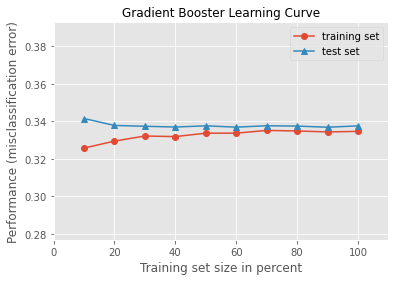

Model: Gradient Booster
Model score: 0.66
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.64      0.88      0.74     15998
           1       0.75      0.40      0.52     13581

    accuracy                           0.66     29579
   macro avg       0.69      0.64      0.63     29579
weighted avg       0.69      0.66      0.64     29579

----------------------------------------------------------
Baseline Scores List
{'Decision Tree': 0.66, 'Decision Tree Bagger': 0.66, 'Gradient Booster': 0.66}


In [17]:
for model, name in zip(models, model_names):
    evaluate_model(model, X_train, X_test, y_train, y_test, name)

In [18]:
scores_df = pd.DataFrame.from_dict(baseline_score, orient='index', columns = ['Scores'])
scores_df

,Scores
Decision Tree,0.66
Decision Tree Bagger,0.66
Gradient Booster,0.66


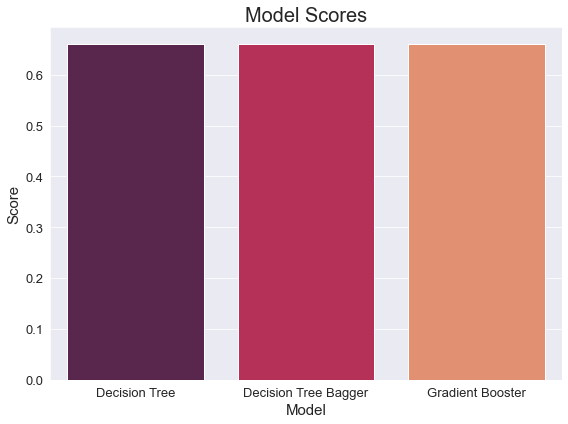

In [19]:
# Visualize data
plt.figure(figsize=(8, 6))
ax = sns.set_style('darkgrid')
ax = sns.barplot(x=scores_df.index, y = scores_df['Scores'], palette = 'rocket')
ax.set_xlabel('Model', fontsize = 15)
ax.set_ylabel('Score', fontsize = 15)
ax.axes.set_title('Model Scores', fontsize = 20)
plt.xticks()
plt.tick_params(labelsize = 13)
plt.tight_layout()

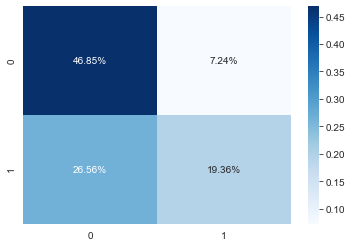

In [29]:
y_pred_dt = dt.predict(X_test)
cm_dt = metrics.confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt/np.sum(cm_dt), annot = True, fmt='.2%', cmap = 'Blues')


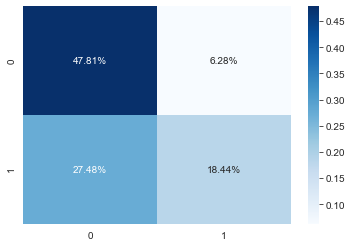

In [30]:
y_pred_gbc = gbc.predict(X_test)
cm_gbc = metrics.confusion_matrix(y_test, y_pred_gbc)
sns.heatmap(cm_gbc/np.sum(cm_gbc), annot = True, fmt='.2%', cmap = 'Blues')

# Use Case - If a case were called on me would they expect to use force on me?

In [20]:
number = 0
for i in X.columns:
    number += 1
    print(number, ':', i)

1 : Incident Location: Street/Highway
2 : Incident Location: Public Transport
3 : Incident Location: Retail Premises
4 : Incident Location: Open ground (e.g. park, car park, field)
5 : Incident Location: Licensed Premises
6 : Incident Location: Sports or Event Stadia
7 : Incident Location: Hospital/A&E (non-mental-health setting)
8 : Incident Location: Mental Health Setting
9 : Incident Location: Police vehicle with prisoner handling cage
10 : Incident Location: Police vehicle without prisoner handling cage
11 : Incident Location: Dwelling
12 : Incident Location: Police station (excluding custody block)
13 : Incident Location: Custody Block
14 : Incident Location: Ambulance
15 : Incident Location: Other
16 : MainDuty: AFO
17 : MainDuty: ARV
18 : MainDuty: CID
19 : MainDuty: CTSFO
20 : MainDuty: Custody
21 : MainDuty: Dog handler duty
22 : MainDuty: Foot patrol
23 : MainDuty: Mobile patrol
24 : MainDuty: Mounted section duties
25 : MainDuty: Off duty
26 : MainDuty: Other
27 : MainDuty: 

# Subject Features
- At Sports Stadium
- Officer called is mobile patrol
- They are Single Crewed
- subject age 24
- No disability
- Male
- Asian
- In Lewisham

In [21]:
case = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        3, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 7, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0]

print(len(case))

77


In [22]:
gradient_boost_prediction = gbc.predict(np.array([case]))[0]
print(gradient_boost_prediction)

0


In [23]:
dt_prediction = dt.predict(np.array([case]))[0]
dtbag_prediction = dtbag.predict(np.array([case]))[0]
gradient_boost_prediction = gbc.predict(np.array([case]))[0]

outcomes = {}

preds = [dt_prediction, dtbag_prediction, gradient_boost_prediction]
names = ['Decision Tree', 'Decision Tree Bagger', 'Gradient Booster']

for outcome, name in zip(preds, names):
    outcomes[name] = outcome

final_output = pd.DataFrame.from_dict(outcomes, orient = 'index', columns = ['Outcome'])
final_output

,Outcome
Decision Tree,0
Decision Tree Bagger,0
Gradient Booster,0


In [24]:
print(dt.predict_proba(np.array([case]))[0])
print(dtbag.predict_proba(np.array([case]))[0])
print(gbc.predict_proba(np.array([case]))[0])

[0.71980603 0.28019397]
[0.6855053 0.3144947]
[0.60882212 0.39117788]


In [25]:
final_output['Chance that Officer required to use force'] = [1-0.72, 1-0.69, 1-0.60]
final_output

,Outcome,Chance that Officer required to use force
Decision Tree,0,0.28
Decision Tree Bagger,0,0.31
Gradient Booster,0,0.40


# Feature Importances

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00302
Feature: 3, Score: 0.00080
Feature: 4, Score: 0.00062
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.01455
Feature: 7, Score: 0.00170
Feature: 8, Score: 0.00670
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.01706
Feature: 11, Score: 0.01251
Feature: 12, Score: 0.38454
Feature: 13, Score: 0.00303
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.07475
Feature: 17, Score: 0.00390
Feature: 18, Score: 0.01392
Feature: 19, Score: 0.00112
Feature: 20, Score: 0.01365
Feature: 21, Score: 0.00203
Feature: 22, Score: 0.00760
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.01107
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.03177
Feature: 27, Score: 0.00317
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00587
Feature: 30, Score: 0.00677
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.27704
Feature: 33, Score: 0.00076
Feature: 34, Score: 0.02922
Feature: 35, Score: 0.00000
Fe

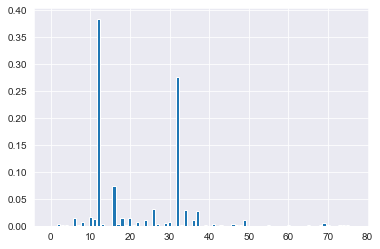

In [32]:
# get importance Decision Tree
importance = dt.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

- Incidents at location: Dwelling and the Subject Age had the highest feautre importances.

Feature: 0, Score: 0.00137
Feature: 1, Score: 0.00117
Feature: 2, Score: 0.00315
Feature: 3, Score: 0.00047
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.01244
Feature: 7, Score: 0.00111
Feature: 8, Score: 0.00543
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.01431
Feature: 11, Score: 0.01485
Feature: 12, Score: 0.38587
Feature: 13, Score: 0.00205
Feature: 14, Score: 0.00047
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.07681
Feature: 17, Score: 0.00732
Feature: 18, Score: 0.01443
Feature: 19, Score: 0.00411
Feature: 20, Score: 0.01125
Feature: 21, Score: 0.00429
Feature: 22, Score: 0.00222
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00782
Feature: 25, Score: 0.00103
Feature: 26, Score: 0.02807
Feature: 27, Score: 0.00289
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00869
Feature: 30, Score: 0.00453
Feature: 31, Score: 0.00037
Feature: 32, Score: 0.27518
Feature: 33, Score: 0.00187
Feature: 34, Score: 0.02838
Feature: 35, Score: 0.00039
Fe

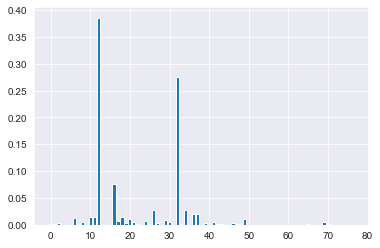

In [34]:
# get importance Gradient Booster
importance = gbc.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

- The same Feature importance ranks are true for GBC